<a href="https://colab.research.google.com/github/RedPanda54/Study/blob/main/Theme%2002.%20%EB%A1%9C%EB%B4%87%20%EC%9D%B4%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **로봇 이동**

Easy 버전

(문제)

n * n 크기의 방이 있고, 그 안은 1 * 1 크기의 작은 정사각형들로 나뉘어 있는데, 이 방들은 검은색이거나 흰색이다. 흰 정사각형은 로봇이 갈 수 있는 곳이고 검은 정사각형은 막힌 곳이다. 로봇은 현재 위치해 있는 흰 정사각형에서 상하좌우 네 방향 중 하나에 인접한 흰 정사각형으로만 갈 수 있다.

로봇이 도착점에서 출발점까지 가는데 필요한 최소 이동 횟수를 구해서 출력하라.

단, 출발점은 최상단 왼쪽 (1, 1) 정사각형, 도착점은 최하단 오른쪽 (n, n) 정사각형으로 고정된다.

(입력)
1. 첫 줄에 방의 크기를 나타내는 정수 n이 주어진다. (2 <= n <= 100)
2. 두 번째 줄부터 n개의 줄에는 '0' 또는 '1'로만 이루어진 길이 n인 문자열이 주어진다. '0'은 검은색, '1'은 흰색을 나타낸다.

(출력)

- 로봇이 출발점에서 도착점까지 가는데 필요한 최소 이동 횟수를 출력한다.
- 만약, 로봇이 출발점에서 도착점까지 가는 것이 불가능하다면, -1을 출력한다.

(코드 설명)<br>
- 최소 이동 횟수를 찾는다는 것은 최소 경로의 길이를 찾는 것과 같다. 즉, **BFS 알고리즘**을 사용한다면 손쉽게 해결이 가능하다.<br>
- 먼저 n * n만큼의 격자를 만들어서 경로의 길이를 추정하고자 한다. 이때, (n+2) * (n+2)로 넓혀잡아서 격자를 만든다. 인덱스와 위치의 숫자를 맞추기 위함인데, 격자에 테두리를 더한다고 생각해도 좋을것 같다.<br>
- 0과 1로 이뤄진 입력 문자열에 맞춰 격자를 이분류 시켜준다. 아래의 코드의 경우 MAX와 -MAX로 이분류를 시켜준 것. 이때, 테두리에 해당하는 행과 열은 -MAX로 마킹을 해서 격자를 벗어나지 않게 해준다. 이렇게 설정한 격자의 출발점은 (1, 1), 도착점은 (n, n)이 될 것이다.<br>
- Queue를 하나 잡아주고, 이동 방향 directions를 잡아준다. 이 Queue라는 자료구조에는 갈 수 있는 위치가 튜플의 형태로 push가 될 것이고, 앞쪽부터 순서대로 directions 방향으로 나아가면서 최소 경로의 길이를 계산할 것이다.
- Queue의 초기값을 출발점 (1, 1)로 잡아 경로를 탐색해 도착점 (n, n)까지 BFS로 경로 탐색해 도착점까지의 최소 경로의 길이를 출력한다. 이때, 여전히 도착점의 숫자가 -MAX라면 도착점까지의 경로가 없다고 판단해 '-1'을 출력한다.

In [3]:
# easy 버전
from collections import deque

# 입력
n = int(input())

# count[i][j] = (i행, j열)에 도달하기 위한 최소 이동 횟수
# 갈 수 있는 곳은 MAX값으로 채우고, 못가는 곳은 -MAX값 그대로 둔다.
MAX = 10000
count = [[-MAX] * (n+2) for _ in range(n+2)]

for i in range(1, n+1):
	temp = input()
	for j in range(1, n+1):
		if temp[j-1] == '1':	# '1'이면 흰 정사각형. 갈 수 있는 곳이다.
			count[i][j] = MAX

# Dequeue 선언
q = deque()
q.append((1, 1))
count[1][1] = 0	# 시작점은 일단 0으로 초기화한다.

# 4가지 이동 방향
# [아래, 위, 우, 좌]
directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

# 큐가 비었거나, 도착점에 도달했으면 루프를 빠져나간다.
while len(q) > 0 and count[n][n] == MAX:
	now_row, now_col = q.popleft()
	new_count = count[now_row][now_col] + 1

	# 현재 위치에서 4가지 인접 방향으로 방을 살핀다.
	# 아직 MAX라면 방문한 적이 없는 방이라는 것. queue에 넣어준다.
	for dx, dy in directions:
		x, y = now_row, now_col
		x += dx
		y += dy
		if count[x][y] == MAX:
			count[x][y] = new_count
			q.append((x, y))

# count[n][n] == MAX 라면??
# while이 끝났음에도 도착지가 MAX라면 방문할 경로가 없다는 것이다.
print(count[n][n] if count[n][n] != MAX else -1)

10
1001011111
1110010110
1010111110
1111110111
0010111111
1101111011
1110011111
1111110101
1101101111
0110110011
18


Medium 버전

조건은 easy 버전과 같다.

이번 문제의 로봇은 직진하는 데에는 시간이 거의 안 걸리지만, 방향을 바꾸기 위해서 우회전/좌회전 하는데 많은 시간이 걸린다. 따라서 로봇을 움직이는데 중요한 점은 되도록 회전 횟수를 줄이는 것이다. 출발점에서 도착점까지의 최소 회전 횟수를 구해서 출력하라.

(출력)

- 로봇이 출발점에서 도착점까지 가는데 필요한 최소 회전 횟수를 출력한다.
- 만약, 로봇이 출발점에서 도착점까지 가는 것이 불가능하다면, -1을 출력한다.

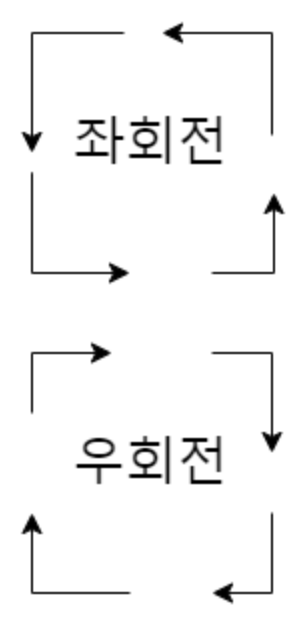

(예시)<br>
- (1, 1) -> (5, 1) -> (5, 3) -> (7, 3) -> (7, 10) -> (10, 10)

 - 로봇이 출발점(1, 1)에서 아래 방향으로 직진한다.
 - (5, 1)에서 ***좌회전***하여 직진한다.
 - (5, 3)에서 ***우회전***하여 직진한다.
 - (7, 3)에서 ***좌회전***하여 직진한다.
 - (7, 10)에서 ***우회전***하여 직진하면 도착점 (10, 10)에 이른다.
 - 따라서, 총 4번의 회전을 하였다.

(코드 설명)<br>
- easy 버전과 거의 유사하다.<br>
- 다만, 이전에는 현재 위치에 지금까지 경로의 길이를 저장했는데, 이번에는 현재 위치에 지금까지의 회전 횟수를 저장한다.

In [1]:
# medium 버전
from collections import deque

MAX = 10000
n = int(input())
count = [[-MAX] * (n+2) for _ in range(n+2)]

for i in range(1, n+1):
	temp = input()
	for j in range(1, n+1):
		if temp[j-1] == '1':
			count[i][j] = MAX

q = deque()
q.append((1, 1)) # 시작점을 큐에 넣는다.
count[1][1] = -1 # 시작점은 일단 -1로 초기화한다.

directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

# 큐가 비었거나, 도착점에 도달했으면 루프를 빠져나간다.
while len(q) > 0 and count[n][n] == MAX:
	now_row, now_column = q.popleft()
	new_count = count[now_row][now_column] + 1

	for dx, dy in directions:
		x, y = now_row, now_column
		while True:
			x += dx
			y += dy
			# 계속 직진하다가 막히면 빠져나간다.
			# 현재의 회전 횟수보다
			# 더 작은 값이 들어가 있어도 빠져나간다.
			if new_count > count[x][y]:
				break

			# 처음 도달한 곳이면 현재의 회전 횟수(c)를
			# 저장해주고, 그 위치를 큐에 넣는다.
			if count[x][y] == MAX:
				count[x][y] = new_count
				q.append((x, y))

print(count[n][n] if count[n][n] != MAX else -1)


10
1111111011
1011111011
1000011101
1110110111
1110111101
0011000001
0011111111
0010001111
0101110001
1101111101
4
